<h1>Data Exploration</h1>
<p>In this notebook we will perform a broad data exploration on the <code>Weekly</code> data set. Note that the aim of this exploration is not to be completely thorough; instead we would like to gain quick insights to help develop a first prototype. Upon analyzing the output of the prototype, we can analyze the data further to gain more insight.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%run ../../customModules/DataQualityReports.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p>We first read the comma-separated values (csv) <code>Weekly</code> file into a pandas DataFrame. To get a feeling for the data we display the top five rows of the DataFrame using the <code>head()</code> method and we show how many rows and columns the DataFrame has by using the <code>shape</code> attribute. We also show the <code>dtypes</code> attribute, which returns a pandas Series with the data type of each column.</p>

In [2]:
df = pd.read_csv("Weekly.csv")
df.head()
df.shape
df.dtypes

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


(1089, 9)

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

<p>It appears that all the columns have the data type we would expect. We can perform another check to see if any values are missing in the DataFrame using its <code>isnull</code> method.</p>

In [3]:
df[df.isnull().any(axis=1)]
df[df.isnull().any(axis=1)].shape

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction


(0, 9)

<p>There are no obvious missing values in our data. So the next step to be able to produce the data quality reports with our custom <code>createDataQualityReports</code> function is to organize our DataFrame by quantitative and categorical variables using hierarchical indexing.</p>

In [4]:
df.columns = pd.MultiIndex.from_tuples([('quantitative', 'Year'), ('quantitative', 'Lag1'), 
                          ('quantitative', 'Lag2'), ('quantitative', 'Lag3'),
                         ('quantitative', 'Lag4'), ('quantitative', 'Lag5'), 
                        ('quantitative', 'Volume'), ('quantitative', 'Today'), 
                        ('categorical', 'Direction')],
                        names=['type of variable', 'variable'])
df = df.reindex(columns=['categorical', 'quantitative'], level=0)
df = df.reindex(columns=['Direction', 'Today', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Year'], level=1)
df.head()

type of variable categorical quantitative                                     \
variable           Direction        Today   Lag1   Lag2   Lag3   Lag4   Lag5   
0                       Down       -0.270  0.816  1.572 -3.936 -0.229 -3.484   
1                       Down       -2.576 -0.270  0.816  1.572 -3.936 -0.229   
2                         Up        3.514 -2.576 -0.270  0.816  1.572 -3.936   
3                         Up        0.712  3.514 -2.576 -0.270  0.816  1.572   
4                         Up        1.178  0.712  3.514 -2.576 -0.270  0.816   

type of variable                  
variable            Volume  Year  
0                 0.154976  1990  
1                 0.148574  1990  
2                 0.159837  1990  
3                 0.161630  1990  
4                 0.153728  1990

<p>Now we can create the data quality reports.</p>

In [5]:
df_qr_quantitative, df_qr_categorical = createDataQualityReports(df)
df_qr_quantitative.name + ':'
df_qr_quantitative.round(2)
df_qr_categorical.name + ':'
df_qr_categorical.round(2)

'Quantitative Qualilty Report:'

,Count,Miss. (%),Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
variable,,,,,,,,,,
Today,1089,0.0,1003,-18.20,-1.15,0.15,0.24,1.40,12.03,2.36
Lag1,1089,0.0,1004,-18.20,-1.15,0.15,0.24,1.40,12.03,2.36
Lag2,1089,0.0,1005,-18.20,-1.15,0.15,0.24,1.41,12.03,2.36
Lag3,1089,0.0,1005,-18.20,-1.16,0.15,0.24,1.41,12.03,2.36
Lag4,1089,0.0,1005,-18.20,-1.16,0.15,0.24,1.41,12.03,2.36
Lag5,1089,0.0,1005,-18.20,-1.17,0.14,0.23,1.40,12.03,2.36
Volume,1089,0.0,1089,0.09,0.33,1.57,1.00,2.05,9.33,1.69
Year,1089,0.0,21,1990.00,1995.00,2000.05,2000.00,2005.00,2010.00,6.03


'Categorical Qualilty Report:'

,Count,Miss. (%),Card.,Mode,Mode Freq.,Mode (%),2nd Mode,2nd Mode Freq.,2nd Mode (%)
variable,,,,,,,,,
Direction,1089,0.0,2,Up,605,55.56,Down,484,44.44


<p>To further gain insight into the data, we use the <code>plotQuantitativeVariables</code> and <code>plotCategoricalVariables</code> functions the produce the frequency plots for each quantitative and categorical variable.</p>

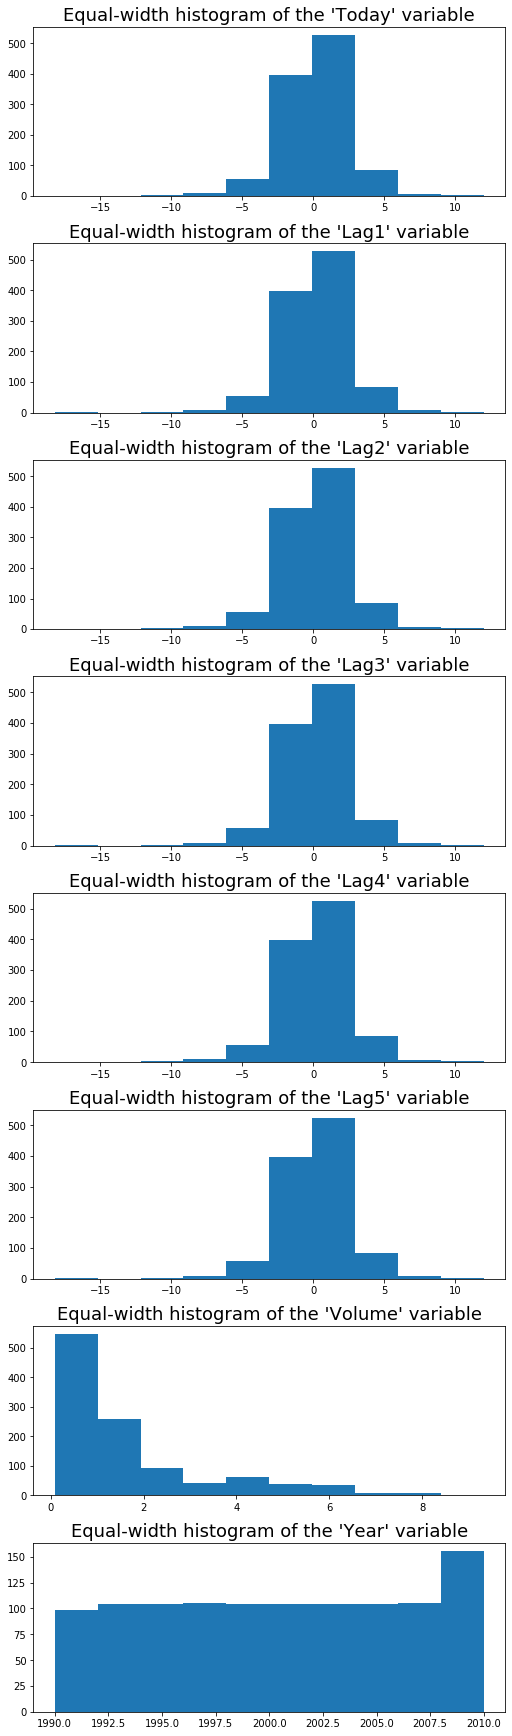

In [6]:
plotQuantitativeVariables(df.xs('quantitative', axis=1), height=3, width=7)

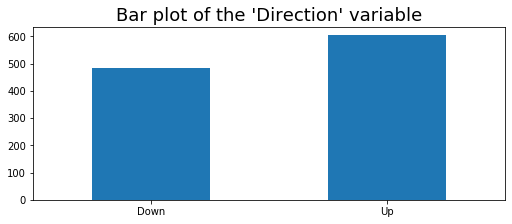

In [7]:
plotCategoricalVariables(df.xs('categorical', axis=1), height=3, width=7)

<p>We also compute the correlation matrix of the variables.</p>

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)